In [37]:
import numpy as np

data = np.load('data.npy')
target = np.load('target.npy')

In [38]:
print(data.shape)
print(target.shape)

(261, 2500)
(261,)


In [39]:
import collections
print(collections.Counter(target))


Counter({np.int64(1): 96, np.int64(3): 63, np.int64(2): 54, np.int64(0): 48})


In [40]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf')

model = make_pipeline(pca,svc)

In [41]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target = train_test_split(data,target,test_size=0.1)

In [42]:
model.fit(train_data,train_target)

Pipeline(steps=[('pca', PCA(n_components=150, random_state=42, whiten=True)),
                ('svc', SVC())])

In [43]:
predicted_target = model.predict(test_data)

In [44]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(test_target,predicted_target)
print(acc)

0.8518518518518519


In [46]:
from sklearn.metrics import classification_report

print(classification_report(test_target,predicted_target,target_names=['Avishka',"Dulanga","Iduwara","Isuru"]))

              precision    recall  f1-score   support

     Avishka       1.00      1.00      1.00         5
     Dulanga       0.75      1.00      0.86        12
     Iduwara       0.00      0.00      0.00         4
       Isuru       1.00      1.00      1.00         6

    accuracy                           0.85        27
   macro avg       0.69      0.75      0.71        27
weighted avg       0.74      0.85      0.79        27



c:\Users\sdams\miniconda3\envs\conda_venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sdams\miniconda3\envs\conda_venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sdams\miniconda3\envs\conda_venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

In [47]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

matrix = confusion_matrix(test_target,predicted_target)
print(matrix)

[[ 5  0  0  0]
 [ 0 12  0  0]
 [ 0  4  0  0]
 [ 0  0  0  6]]


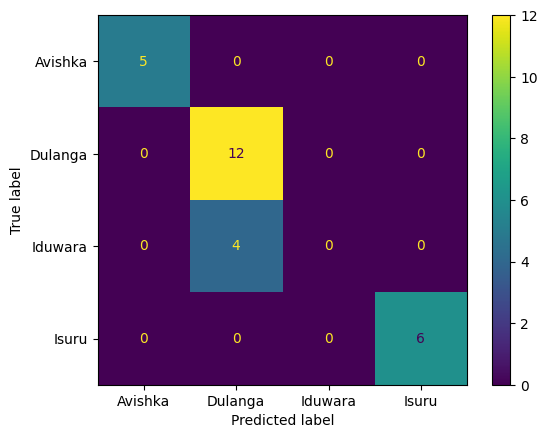

In [49]:
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=['Avishka',"Dulanga","Iduwara","Isuru"])
disp.plot()

In [50]:
import joblib

joblib.dump(model,"svm_face_recognisation.sav")

['svm_face_recognisation.sav']